In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,roc_auc_score, r2_score, accuracy_score

from sklearn.ensemble import  RandomForestClassifier

from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
def churnToNumeric(x):
    if x=="No" :
        return 0
    if x=="Yes":
        return 1
    
df["churn_Num"]=df["Churn"].apply(churnToNumeric)
    

In [4]:
df.drop(["Churn"],axis=1,inplace=True)

In [5]:
df.isna().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn_Num           0
dtype: int64

In [6]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,SeniorCitizen,tenure,MonthlyCharges,churn_Num
SeniorCitizen,1,0.017,0.22,0.15
tenure,0.017,1,0.25,-0.35
MonthlyCharges,0.22,0.25,1,0.19
churn_Num,0.15,-0.35,0.19,1


In [7]:
## Which features are available in dataset?
print(df.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'churn_Num']


In [8]:
## Which features are categorical?
print(df.info())## this gives us information about non null values and dtype also

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
churn_Num           7043 non-null int64
dtypes: float64(1), int64(3), obje

In [9]:
## What is the distribution of numerical feature values across the samples?
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,churn_Num
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [10]:
## What is the distribution of categorical features?
df.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,7874-ECPQJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


In [11]:
###   Analyze by pivoting features
df[["gender","churn_Num"]].groupby(['gender'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)




,gender,churn_Num
0,Female,939
1,Male,930


In [12]:
df[["Partner","churn_Num"]].groupby(['Partner'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,Partner,churn_Num
0,No,1200
1,Yes,669


In [13]:
df[["Dependents","churn_Num"]].groupby(['Dependents'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,Dependents,churn_Num
0,No,1543
1,Yes,326


In [14]:
df[["PhoneService","churn_Num"]].groupby(['PhoneService'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,PhoneService,churn_Num
1,Yes,1699
0,No,170


In [15]:
df[["tenure","churn_Num"]].groupby(['tenure'], as_index = False).mean().sort_values(by="churn_Num",ascending= False)

,tenure,churn_Num
1,1,0.619902
2,2,0.516807
5,5,0.481203
4,4,0.471591
3,3,0.470000
7,7,0.389313
10,10,0.387931
9,9,0.386555
15,15,0.373737
6,6,0.363636


In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'churn_Num'], dtype=object)

In [17]:
df[["MultipleLines","churn_Num"]].groupby(['MultipleLines'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,MultipleLines,churn_Num
2,Yes,850
0,No,849
1,No phone service,170


In [18]:
df[["InternetService","churn_Num"]].groupby(['InternetService'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,InternetService,churn_Num
1,Fiber optic,1297
0,DSL,459
2,No,113


In [19]:
df[["OnlineSecurity","churn_Num"]].groupby(['OnlineSecurity'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,OnlineSecurity,churn_Num
0,No,1461
2,Yes,295
1,No internet service,113


In [20]:
df[["OnlineBackup","churn_Num"]].groupby(['OnlineBackup'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,OnlineBackup,churn_Num
0,No,1233
2,Yes,523
1,No internet service,113


In [21]:
df[["DeviceProtection","churn_Num"]].groupby(['DeviceProtection'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,DeviceProtection,churn_Num
0,No,1211
2,Yes,545
1,No internet service,113


In [22]:
df[["TechSupport","churn_Num"]].groupby(['TechSupport'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,TechSupport,churn_Num
0,No,1446
2,Yes,310
1,No internet service,113


In [23]:
df[["StreamingTV","churn_Num"]].groupby(['StreamingTV'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,StreamingTV,churn_Num
0,No,942
2,Yes,814
1,No internet service,113


In [24]:
df[["Contract","churn_Num"]].groupby(['Contract'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,Contract,churn_Num
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [25]:
df[["PaperlessBilling","churn_Num"]].groupby(['PaperlessBilling'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,PaperlessBilling,churn_Num
1,Yes,1400
0,No,469


In [26]:
df[["PaymentMethod","churn_Num"]].groupby(['PaymentMethod'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,PaymentMethod,churn_Num
2,Electronic check,1071
3,Mailed check,308
0,Bank transfer (automatic),258
1,Credit card (automatic),232


In [27]:
df[["MonthlyCharges","churn_Num"]].groupby(['MonthlyCharges'], as_index = False).sum().sort_values(by="churn_Num",ascending= False)

,MonthlyCharges,churn_Num
795,74.40,13
805,74.90,9
311,45.30,8
806,74.95,8
1165,93.85,7
1002,85.35,7
715,70.00,7
1176,94.40,7
718,70.15,7
721,70.30,7


In [28]:
males = df[df["gender"]=="Male"]
males.count()

customerID          3555
gender              3555
SeniorCitizen       3555
Partner             3555
Dependents          3555
tenure              3555
PhoneService        3555
MultipleLines       3555
InternetService     3555
OnlineSecurity      3555
OnlineBackup        3555
DeviceProtection    3555
TechSupport         3555
StreamingTV         3555
StreamingMovies     3555
Contract            3555
PaperlessBilling    3555
PaymentMethod       3555
MonthlyCharges      3555
TotalCharges        3555
churn_Num           3555
dtype: int64

In [29]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [30]:
df.dropna(inplace =True)

In [31]:
df.shape

(7032, 21)

In [32]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [33]:
to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in to_replace:
    df[i] = df[i].replace({"No internet service":"No"})
    
    



In [34]:
df["MultipleLines"] = df["MultipleLines"].replace({"No phone service":"No"})

In [35]:
df["MultipleLines"].isin(["No phone service"]).sum()

0

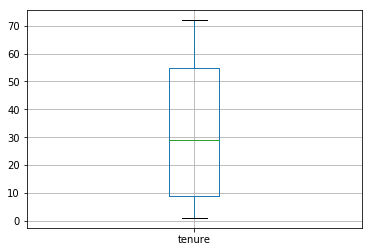

In [36]:
df["tenure"].plot.box(grid= True)

In [37]:
df["tenure"]=pd.cut(df["tenure"], [0,12,24,48,60,1200],labels=["0-12","12-24","24-48","48-60","60+"])

In [38]:
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_Num
0,7590-VHVEG,Female,0,Yes,No,0-12,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,24-48,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,0-12,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,24-48,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,0-12,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,0-12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,12-24,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,0-12,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,24-48,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,60+,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


### EDA (Exploratory Data Analysis)

In [39]:
## Customer Churn in Data

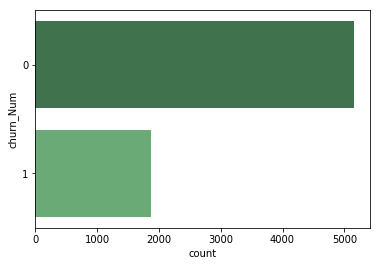

In [40]:
sns.countplot(y=df["churn_Num"], data=df, palette="Greens_d")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012D8F8E9F60>,
      dtype=object)

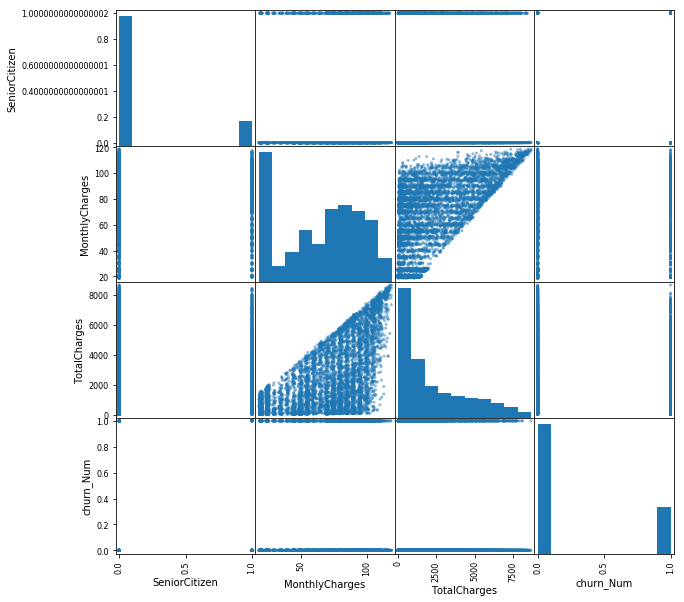

In [41]:
pd.scatter_matrix(df,figsize=(10,10))

In [42]:
### categorical data to Numerical data

In [43]:
to_convert = ["Partner","Dependents", "PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport",
             "StreamingTV","StreamingMovies","PaperlessBilling"]
for i in to_convert:
    df[i] = df[i].replace({"No":"0", "Yes":"1"}).astype(int)
    

In [44]:
### categorical to numeric data using dummies

In [45]:
##df.tenure=df.tenure.cat.codes
df.head(20)


df.Contract = df.Contract.astype("category").cat.codes

df.InternetService = df.InternetService.astype("category").cat.codes

df.PaymentMethod = df.PaymentMethod.astype("category").cat.codes

df.gender = df.gender.astype("category").cat.codes

df.tenure = df.tenure.cat.codes

df.drop("customerID", axis=1, inplace = True)

df.head(7)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_Num
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,2,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
6,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.40,0


In [46]:
data = df.loc[:, ['MonthlyCharges', 'TotalCharges']]
data.head(5)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_Num
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,2,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [47]:
from sklearn import preprocessing

In [48]:
scalar = preprocessing.StandardScaler()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_Num
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,2,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [49]:
df.loc[:, ['MonthlyCharges', 'TotalCharges',"tenure", "PaymentMethod"]]= scalar.fit_transform(df.loc[:, ['MonthlyCharges', 'TotalCharges',"tenure","PaymentMethod"]])


In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn_Num
0,0,0,1,0,-1.171832,0,0,0,0,1,0,0,0,0,0,1,0.399805,-1.161694,-0.994194,0
1,1,0,0,0,0.164148,1,0,0,1,0,1,0,0,0,1,0,1.336636,-0.260878,-0.173740,0
2,1,0,0,0,-1.171832,1,0,0,1,1,0,0,0,0,0,1,1.336636,-0.363923,-0.959649,1
3,1,0,0,0,0.164148,0,0,0,1,0,1,1,0,0,1,0,-1.473857,-0.747850,-0.195248,0
4,0,0,0,0,-1.171832,1,0,1,0,0,0,0,0,0,0,1,0.399805,0.196178,-0.940457,1


In [51]:
## till this step EDA is done! Categorical to numeric conversion is done! And scaling is performed!

In [52]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:18 ]
y = df.iloc[:, 19]


X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [53]:
### Applying Logistic Regression

In [54]:
for i in range(1,19) :
       rfe = RFE(Log_Reg, n_features_to_select = i)
       rfe = rfe.fit(X_train, y_train)
       print(rfe.support_)
        
        
       features_bool = np.array(rfe.support_)
       features = np.array(X_train.columns)
       y_pred = rfe.predict(X_test)
       accuracy = accuracy_score(y_test, y_pred)
       print("Accuracy is :",accuracy)
       X_train = features[features_bool]
       
       X_train
       

NameError: name 'Log_Reg' is not defined

In [ ]:
y_pred = rfe.predict(X_test)

In [ ]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
fpr, tpr , threshold = roc_curve(y_test, y_pred)
logit_roc_auc = roc_auc_score(y_test,rfe.predict(X_test))


r_squared = r2_score(y_test, y_pred)
r_squared

accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
### Applying Random Forest